In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('/content/sonar.csv')
df.columns = [f'F{i+1}' for i in range(60)] + ['Label']
df.head()
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F52,F53,F54,F55,F56,F57,F58,F59,F60,Label
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      207 non-null    float64
 1   F2      207 non-null    float64
 2   F3      207 non-null    float64
 3   F4      207 non-null    float64
 4   F5      207 non-null    float64
 5   F6      207 non-null    float64
 6   F7      207 non-null    float64
 7   F8      207 non-null    float64
 8   F9      207 non-null    float64
 9   F10     207 non-null    float64
 10  F11     207 non-null    float64
 11  F12     207 non-null    float64
 12  F13     207 non-null    float64
 13  F14     207 non-null    float64
 14  F15     207 non-null    float64
 15  F16     207 non-null    float64
 16  F17     207 non-null    float64
 17  F18     207 non-null    float64
 18  F19     207 non-null    float64
 19  F20     207 non-null    float64
 20  F21     207 non-null    float64
 21  F22     207 non-null    float64
 22  F2

In [124]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [125]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 F1       0
F2       0
F3       0
F4       0
F5       0
        ..
F57      0
F58      0
F59      0
F60      0
Label    0
Length: 61, dtype: int64
Duplicate rows: 0


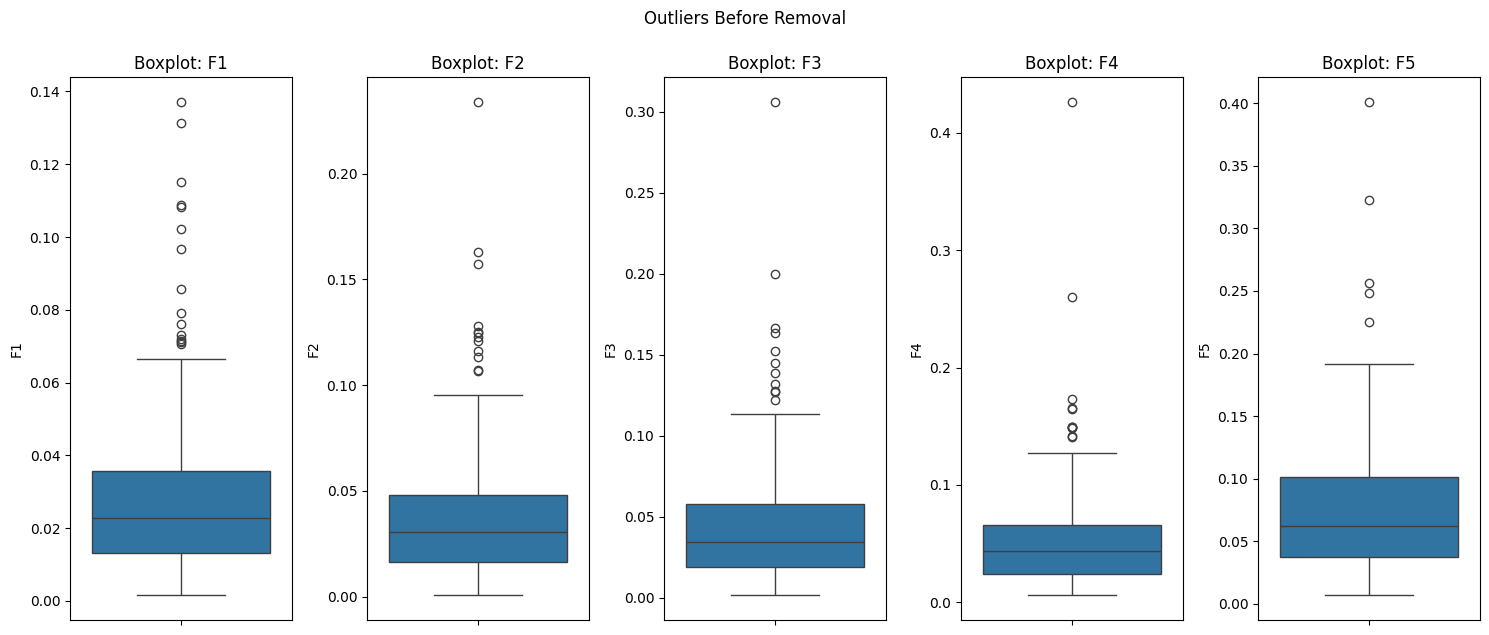

In [126]:
# Visualize boxplots of first 5 features
plt.figure(figsize=(15, 6))
for i, col in enumerate(df.columns[:5]):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.suptitle("Outliers Before Removal", y=1.05)
plt.show()


In [127]:
# Cap outliers at 1st and 99th percentiles
df_capped = df.copy()
for col in df.columns[:-1]:  # Exclude label column 'R'
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df_capped[col] = np.clip(df[col], lower, upper)

# Show change in one column as an example
df[[df.columns[0]]].describe(), df_capped[[df.columns[0]]].describe()


(               F1
 count  207.000000
 mean     0.029208
 std      0.023038
 min      0.001500
 25%      0.013300
 50%      0.022800
 75%      0.035800
 max      0.137100,
                F1
 count  207.000000
 mean     0.029033
 std      0.022210
 min      0.003618
 25%      0.013300
 50%      0.022800
 75%      0.035800
 max      0.114628)

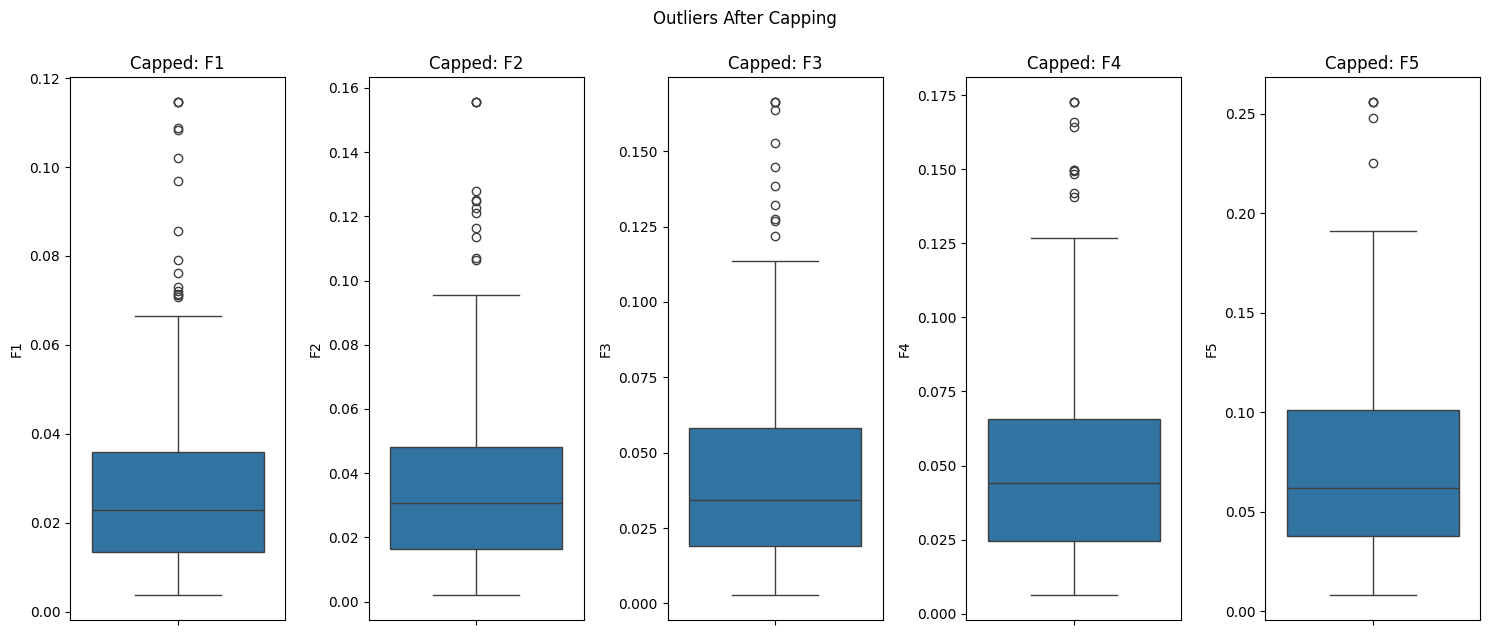

In [128]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(df_capped.columns[:5]):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_capped[col])
    plt.title(f'Capped: {col}')
plt.tight_layout()
plt.suptitle("Outliers After Capping", y=1.05)
plt.show()


In [129]:
# Encode target
df_capped['Label'] = df_capped['Label'].map({'R': 1, 'M': 0})

# Split features and target
X = df_capped.drop(columns='Label')
y = df_capped['Label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



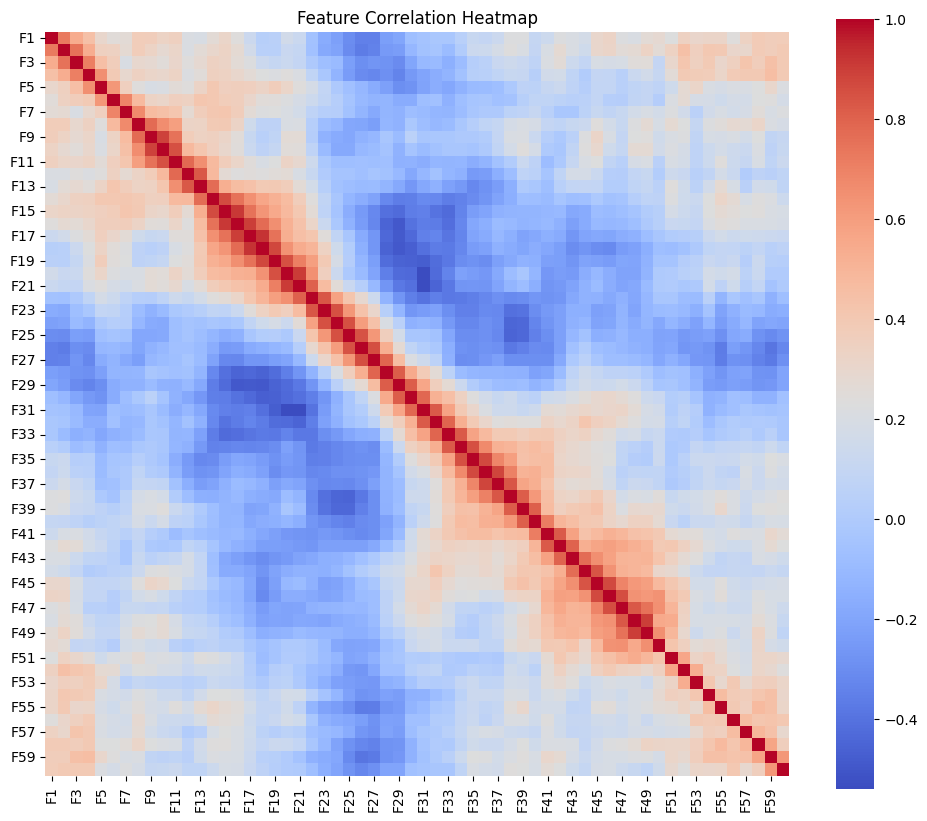

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [132]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'max_iter': [1000]
}

# Create the model
logreg = LogisticRegression()

# Set up GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

# Show best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy with Best Estimator:", test_accuracy)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8303030303030304
Test Accuracy with Best Estimator: 0.7619047619047619


In [133]:
model = LogisticRegression(max_iter=1000, penalty='l2', C=0.1)

In [134]:
model.fit(X_train, y_train)
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Train Accuracy: 0.896969696969697
Test Accuracy: 0.7619047619047619


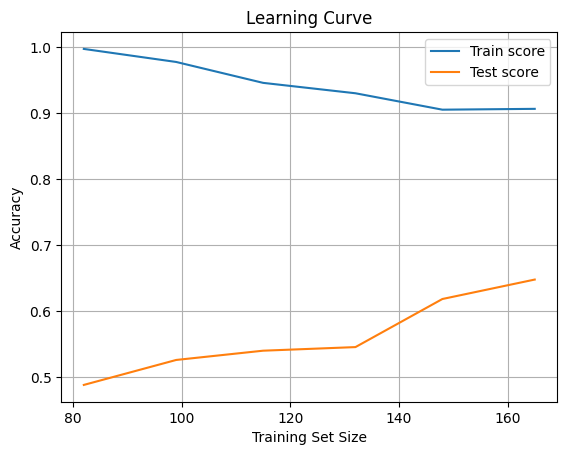

In [135]:
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train score")
plt.plot(train_sizes, test_mean, label="Test score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


In [136]:
# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Mine (0)", "Rock (1)"]))


Classification Report:

              precision    recall  f1-score   support

    Mine (0)       0.84      0.78      0.81        27
    Rock (1)       0.65      0.73      0.69        15

    accuracy                           0.76        42
   macro avg       0.74      0.76      0.75        42
weighted avg       0.77      0.76      0.76        42



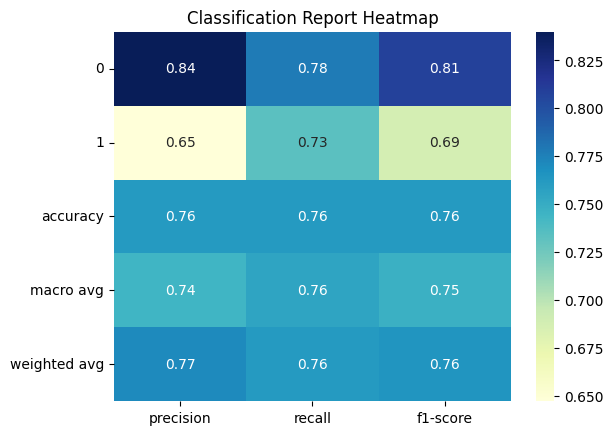

In [137]:
# Create heatmap of classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).iloc[:-1, :].T  # Exclude 'accuracy' row

sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


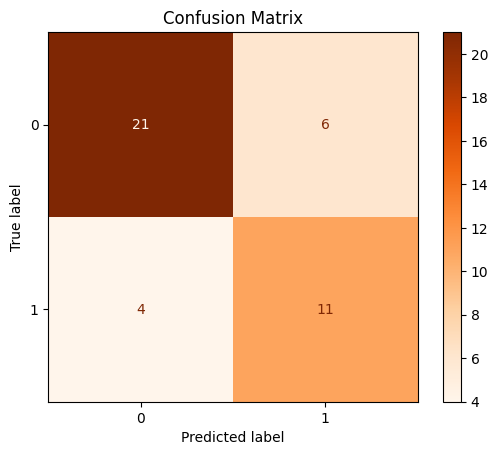

In [138]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()


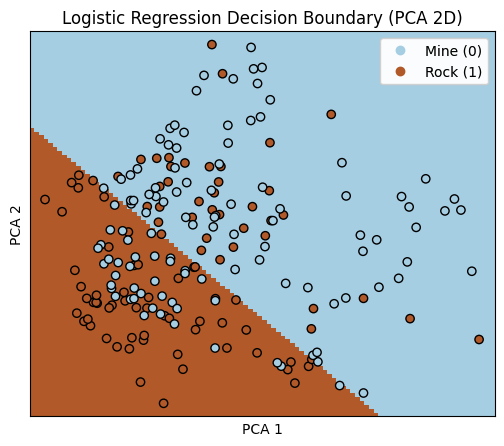

In [139]:
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# Reduce features to 2D with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Re-train logistic regression on PCA-reduced data
logreg_2d = LogisticRegression()
logreg_2d.fit(X_pca, y)

# Plot decision boundary
_, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
    logreg_2d,
    X_pca,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="PCA 1",
    ylabel="PCA 2",
    eps=0.5,
)

# Plot data points
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
legend_labels = ['Mine (0)', 'Rock (1)']
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
ax.add_artist(legend)

plt.title("Logistic Regression Decision Boundary (PCA 2D)")
plt.xticks([])
plt.yticks([])
plt.show()


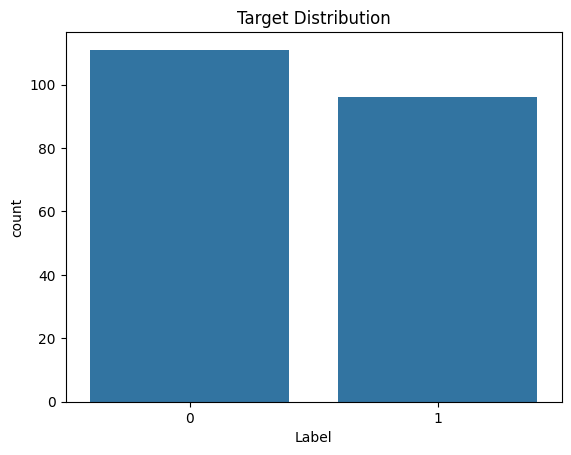

In [140]:
sns.countplot(x=y)
plt.title("Target Distribution")
plt.show()

In [141]:
from sklearn.svm import SVC

In [142]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [143]:
param_grid = {
    'C': [0.01, 0.1, 1],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf',]
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_svm.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, best_svm.predict(X_test)))


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Train Accuracy: 0.9636363636363636
Test Accuracy: 0.7380952380952381


In [144]:

manual_svm = SVC(C=0.15, kernel='rbf', gamma='scale')
manual_svm.fit(X_train, y_train)


y_pred_svm = manual_svm.predict(X_test)
print(" SVM Train Accuracy:", accuracy_score(y_train, manual_svm.predict(X_train)))
print(" SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))


 SVM Train Accuracy: 0.7878787878787878
 SVM Test Accuracy: 0.7857142857142857


In [145]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.80      0.53      0.64        15

    accuracy                           0.79        42
   macro avg       0.79      0.73      0.74        42
weighted avg       0.79      0.79      0.77        42



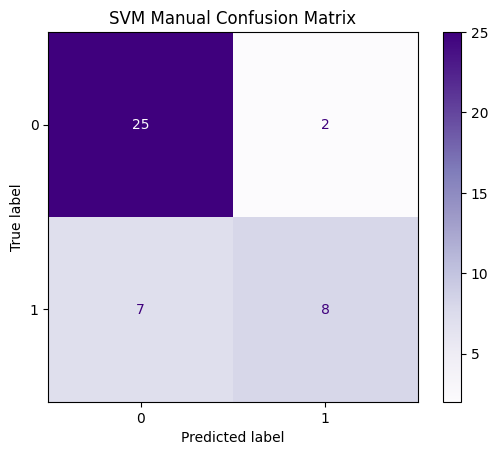

In [146]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("SVM Manual Confusion Matrix")
plt.show()


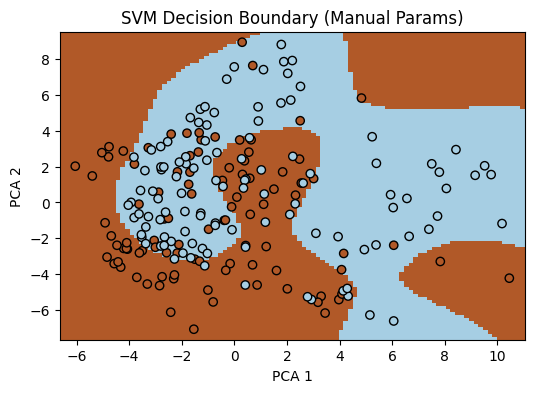

In [147]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svm_2d = SVC(kernel='rbf', C=10, gamma='scale')
svm_2d.fit(X_pca, y)

_, ax = plt.subplots(figsize=(6, 4))
DecisionBoundaryDisplay.from_estimator(
    svm_2d,
    X_pca,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="PCA 1",
    ylabel="PCA 2",
    eps=0.5,
)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary (Manual Params)")
plt.show()
